Install libs

In [17]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import bigquery_storage
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



In [ ]:
credentials = service_account.Credentials.from_service_account_file("/Users/al1543/Downloads/bq.json")
project_id = 'ga-data-1250'
bqclient = bigquery.Client(credentials=credentials, project=project_id)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)

In [ ]:
query = """
WITH event_table as (
SELECT DISTINCT
        fullVisitorId AS user_id, 
        DATE(TIMESTAMP_SECONDS(visitStartTime)) AS visit_day,
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_201701*`
),

user_visits AS (
SELECT  event_table.*,
        day_1_table.visit_day as day_1,
        day_2_table.visit_day as day_2,
        day_3_table.visit_day as day_3,
        day_4_table.visit_day as day_4,
        day_5_table.visit_day as day_5,
        day_6_table.visit_day as day_6,
        day_7_table.visit_day as day_7
FROM event_table
LEFT JOIN event_table AS day_1_table
  ON event_table.user_id = day_1_table.user_id
  AND event_table.visit_day = DATE_ADD(day_1_table.visit_day, INTERVAL -1 DAY)
LEFT JOIN event_table AS day_2_table
  ON event_table.user_id = day_2_table.user_id
  AND event_table.visit_day = DATE_ADD(day_2_table.visit_day, INTERVAL -2 DAY)
LEFT JOIN event_table AS day_3_table
  ON event_table.user_id = day_3_table.user_id
  AND event_table.visit_day = DATE_ADD(day_3_table.visit_day, INTERVAL -3 DAY)
LEFT JOIN event_table AS day_4_table
  ON event_table.user_id = day_4_table.user_id
  AND event_table.visit_day = DATE_ADD(day_4_table.visit_day, INTERVAL -4 DAY)
LEFT JOIN event_table AS day_5_table
  ON event_table.user_id = day_5_table.user_id
  AND event_table.visit_day = DATE_ADD(day_5_table.visit_day, INTERVAL -5 DAY)
LEFT JOIN event_table AS day_6_table
  ON event_table.user_id = day_6_table.user_id
  AND event_table.visit_day = DATE_ADD(day_6_table.visit_day, INTERVAL -6 DAY)
LEFT JOIN event_table AS day_7_table
  ON event_table.user_id = day_7_table.user_id
  AND event_table.visit_day = DATE_ADD(day_7_table.visit_day, INTERVAL -7 DAY)
)

SELECT  visit_day,
        COUNT(day_1)/COUNT(*) AS day_1,
        COUNT(day_2)/COUNT(*) AS day_2,
        COUNT(day_3)/COUNT(*) AS day_3,
        COUNT(day_4)/COUNT(*) AS day_4,
        COUNT(day_5)/COUNT(*) AS day_5,
        COUNT(day_6)/COUNT(*) AS day_6,
        COUNT(day_7)/COUNT(*) AS day_7
FROM user_visits
GROUP BY 1
ORDER BY 1
"""


In [ ]:
results = (
    bqclient.query(query)
            .result()
            .to_dataframe(
                bqstorage_client=bqstorageclient)
)

In [19]:
results # = pd.read_csv("/Users/al1543/Downloads/bq.csv")

,visit_day,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,2017-01-01,0.049826,0.031286,0.017381,0.017381,0.008111,0.011587,0.006952
1,2017-01-02,0.048209,0.033058,0.022039,0.013085,0.011019,0.008953,0.012397
2,2017-01-03,0.071842,0.038573,0.027483,0.013983,0.011572,0.020251,0.017840
3,2017-01-04,0.054955,0.031940,0.009864,0.008924,0.025364,0.019728,0.018318
4,2017-01-05,0.052404,0.017308,0.011058,0.027885,0.022596,0.017788,0.014423
...,...,...,...,...,...,...,...,...
209,2017-07-29,0.041169,0.025060,0.014320,0.005370,0.000000,0.000000,0.000000
210,2017-07-30,0.046927,0.021150,0.009914,0.000000,0.000000,0.000000,0.000000
211,2017-07-31,0.054101,0.012216,0.000000,0.000000,0.000000,0.000000,0.000000
212,2017-08-01,0.021533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 720x432 with 0 Axes>

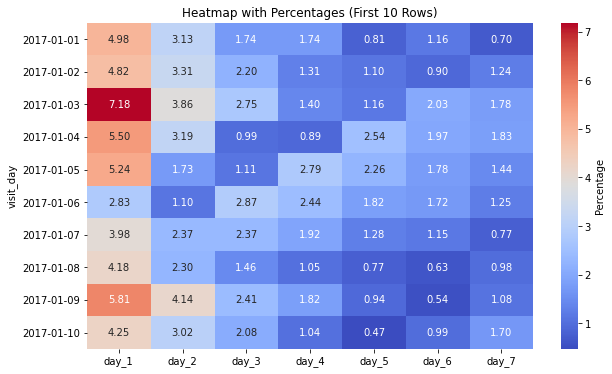

In [22]:
results_df = results.head(10)
results_df = results_df.set_index('visit_day')
results_percentage = results_df * 100
plt.figure(figsize=(10, 6))


# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(results_percentage, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap with Percentages (First 10 Rows)')
plt.show()